In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:/Users/SRISTI/Desktop/practice text doc/insurance_claim_fraud.csv")
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
ds=data.copy()

### EDA

In [4]:
ds.shape

(1000, 40)

dataset has 1000 rows and 40 columns.

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

As we can see that there are no null values except _c39 which doesn't have in it.There are 21 object type, 17 int type and 2 float type columns.
Date columns are also object type, we have to convert them into datetype.

In [6]:
ds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Some columns are not required such as policy_number, _c39, incident_date, auto_model, auto year and policy_csl, so we can drop these columns.

In [7]:
ds.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

From here we came to know that _c39 doesn't contain any value. Except this all other columns do not contain null values.

We can see some unwanted data '?', first we have to drop this.

In [8]:
ds=ds.replace('?',np.nan)
ds

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [9]:
ds.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Now 3 more columns have null values.

First we are going to drop unwanted columns.

In [10]:
ds1=ds.drop(columns=['policy_number','policy_csl','incident_date','auto_model','auto_year','_c39'],axis=1)

In [11]:
ds1

,months_as_customer,age,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,17-10-2014,OH,1000,1406.91,0,466132,MALE,MD,...,YES,1,2,YES,71610,6510,13020,52080,Saab,Y
1,228,42,27-06-2006,IN,2000,1197.22,5000000,468176,MALE,MD,...,NaN,0,0,NaN,5070,780,780,3510,Mercedes,Y
2,134,29,06-09-2000,OH,2000,1413.14,5000000,430632,FEMALE,PhD,...,NO,2,3,NO,34650,7700,3850,23100,Dodge,N
3,256,41,25-05-1990,IL,2000,1415.74,6000000,608117,FEMALE,PhD,...,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Y
4,228,44,06-06-2014,IL,1000,1583.91,6000000,610706,MALE,Associate,...,NO,0,1,NO,6500,1300,650,4550,Accura,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,1000,1310.80,0,431289,FEMALE,Masters,...,YES,0,1,NaN,87200,17440,8720,61040,Honda,N
996,285,41,05-01-2014,IL,1000,1436.79,0,608177,FEMALE,PhD,...,YES,2,3,NaN,108480,18080,18080,72320,Volkswagen,N
997,130,34,17-02-2003,OH,500,1383.49,3000000,442797,FEMALE,Masters,...,NaN,2,3,YES,67500,7500,7500,52500,Suburu,N
998,458,62,18-11-2011,IL,2000,1356.92,5000000,441714,MALE,Associate,...,NaN,0,1,YES,46980,5220,5220,36540,Audi,N


In [12]:
# converting policy_bind_date into date type.

ds1['policy_bind_date']=pd.to_datetime(ds1['policy_bind_date'])

In [13]:
ds1.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                          object
incident_location                 

In [14]:
for i in ds1.columns:
    if ds1[i].dtypes=='object':
        print(i)
        print(ds1[i].unique())

policy_state
['OH' 'IN' 'IL']
insured_sex
['MALE' 'FEMALE']
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_type
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
collision_type
['Side Collision' nan 'Rear Collision' 'Front Collision']
incident_severity
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
aut

First we are going to extract the date and month from policy_bind_date after that we work on other columns.

In [15]:
# extraction of date and month.

ds1['month']=ds1['policy_bind_date'].apply(lambda x:x.month)
ds1['day']=ds1['policy_bind_date'].apply(lambda x:x.day)

In [16]:
ds1

,months_as_customer,age,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,month,day
0,328,48,2014-10-17,OH,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,Y,10,17
1,228,42,2006-06-27,IN,2000,1197.22,5000000,468176,MALE,MD,...,0,NaN,5070,780,780,3510,Mercedes,Y,6,27
2,134,29,2000-06-09,OH,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,N,6,9
3,256,41,1990-05-25,IL,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Y,5,25
4,228,44,2014-06-06,IL,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,N,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,1000,1310.80,0,431289,FEMALE,Masters,...,1,NaN,87200,17440,8720,61040,Honda,N,7,16
996,285,41,2014-05-01,IL,1000,1436.79,0,608177,FEMALE,PhD,...,3,NaN,108480,18080,18080,72320,Volkswagen,N,5,1
997,130,34,2003-02-17,OH,500,1383.49,3000000,442797,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,N,2,17
998,458,62,2011-11-18,IL,2000,1356.92,5000000,441714,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,N,11,18


In [17]:
ds1.drop('policy_bind_date',axis=1,inplace=True)

In [18]:
ds1.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

### Univariate Analysis

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


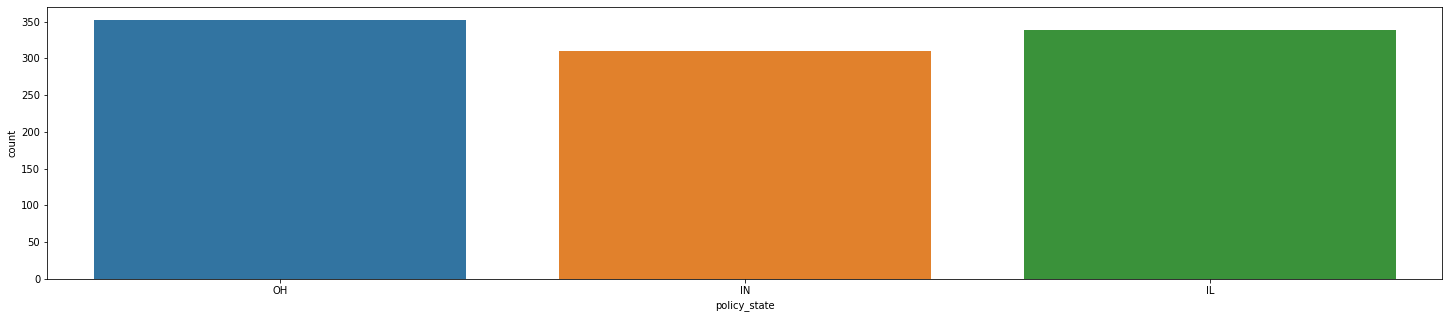

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


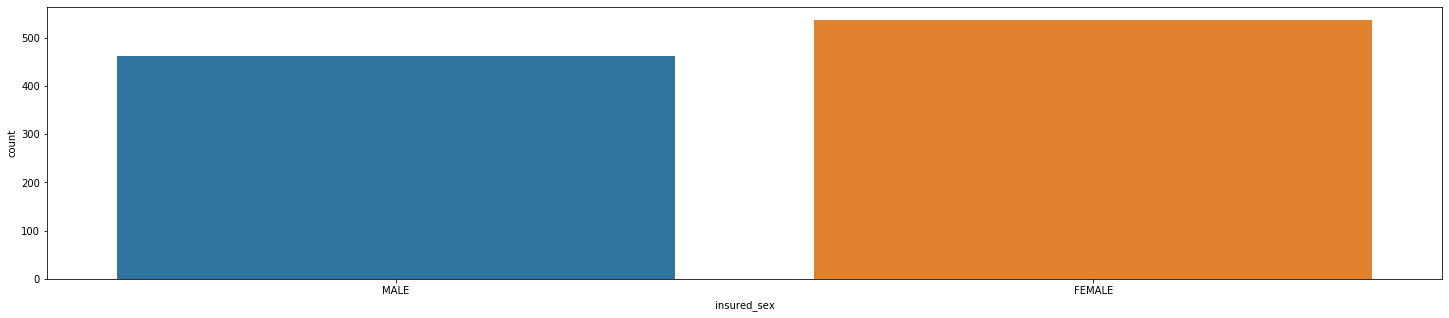

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


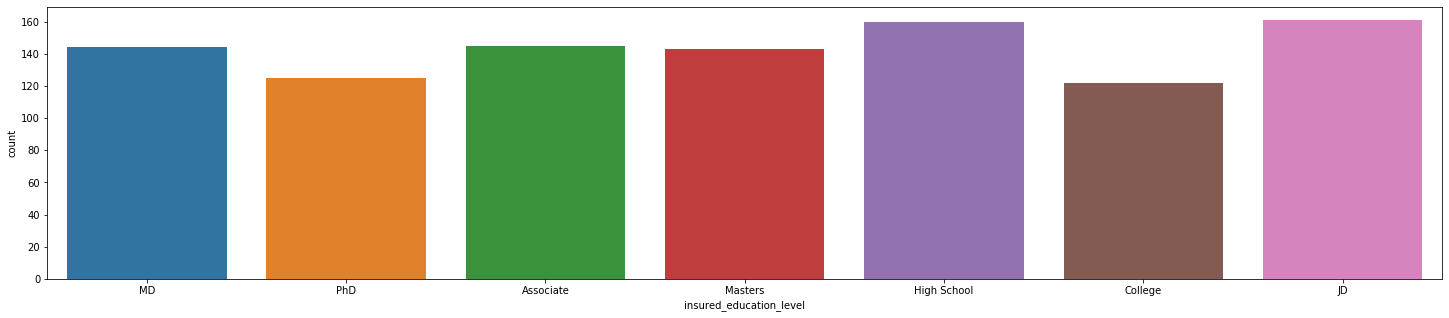

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


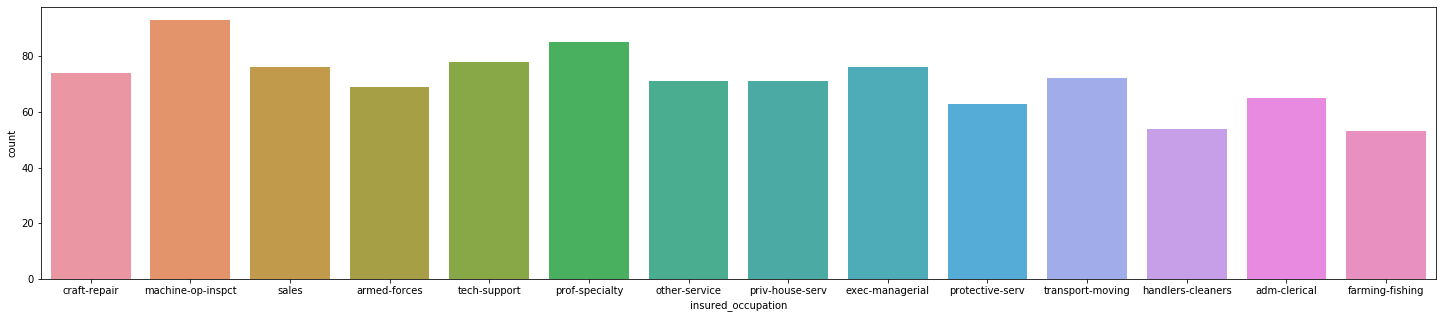

reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
movies            55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


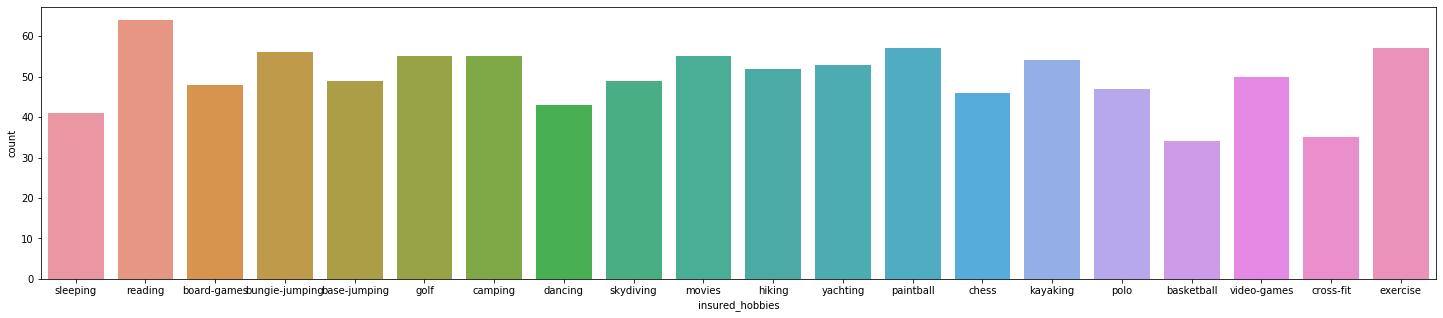

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


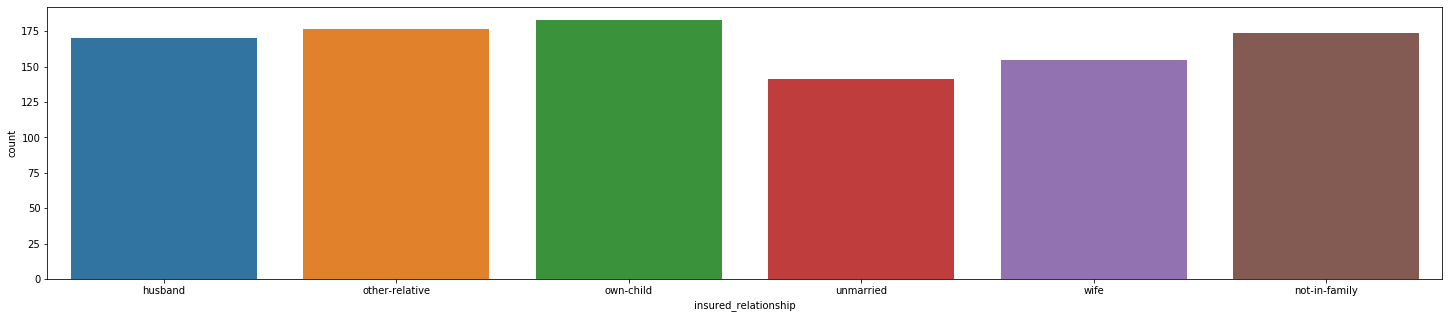

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


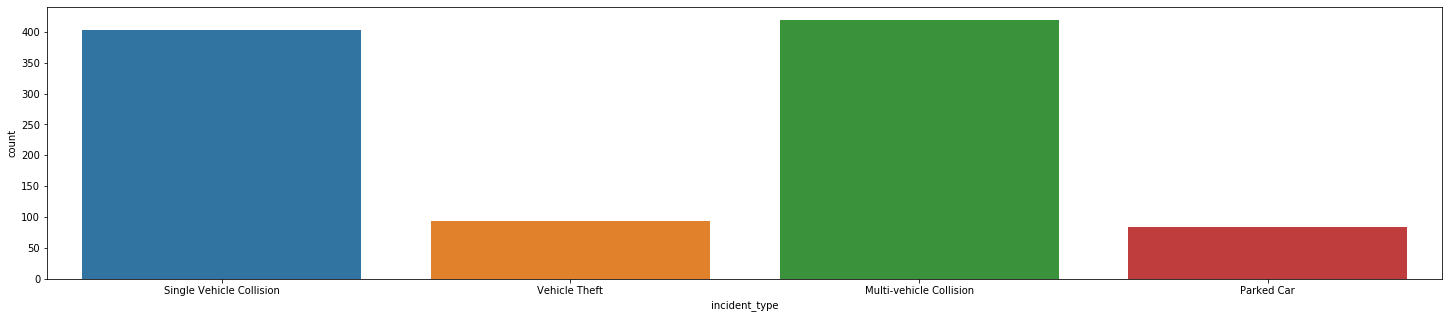

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


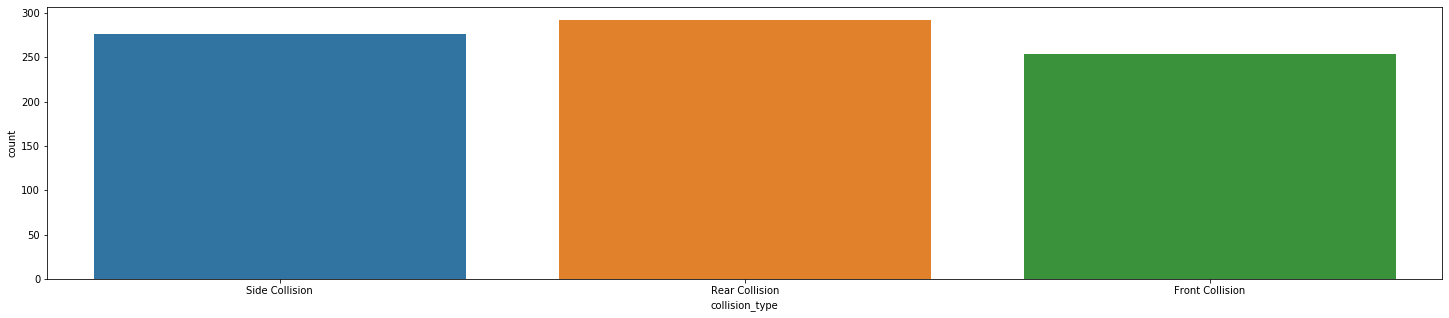

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


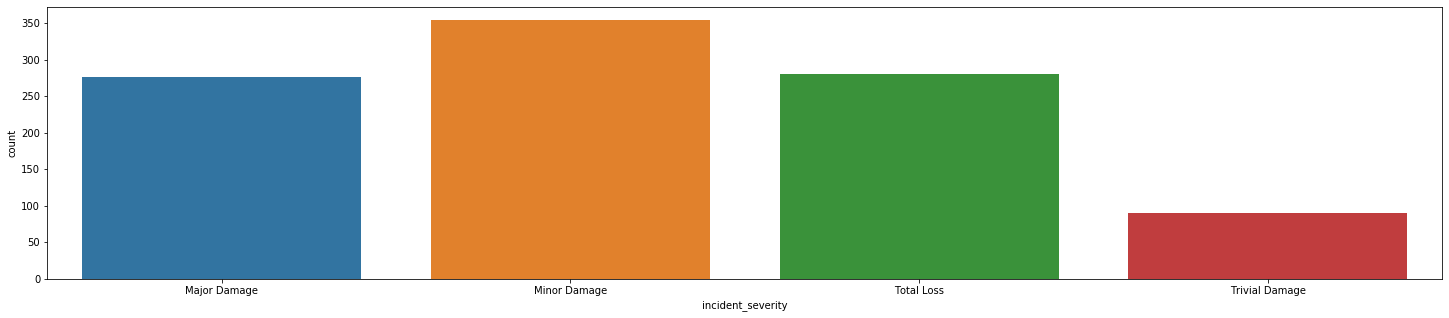

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


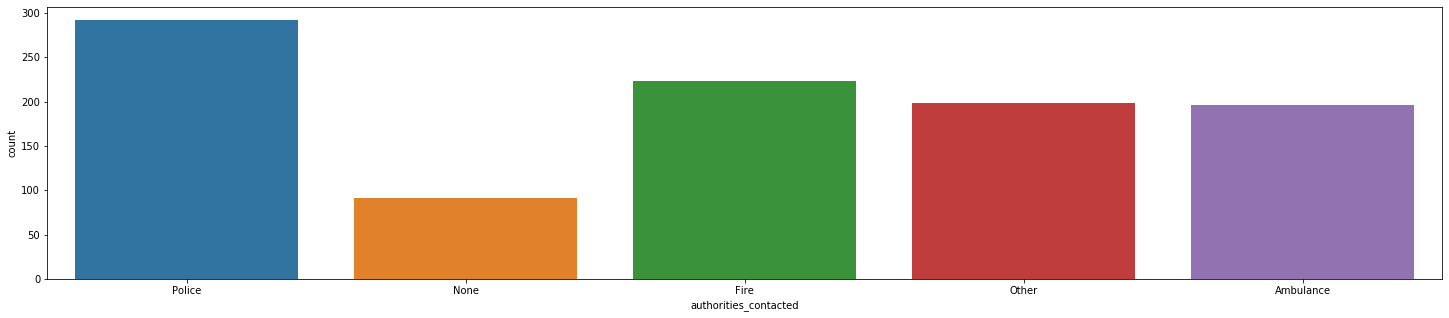

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


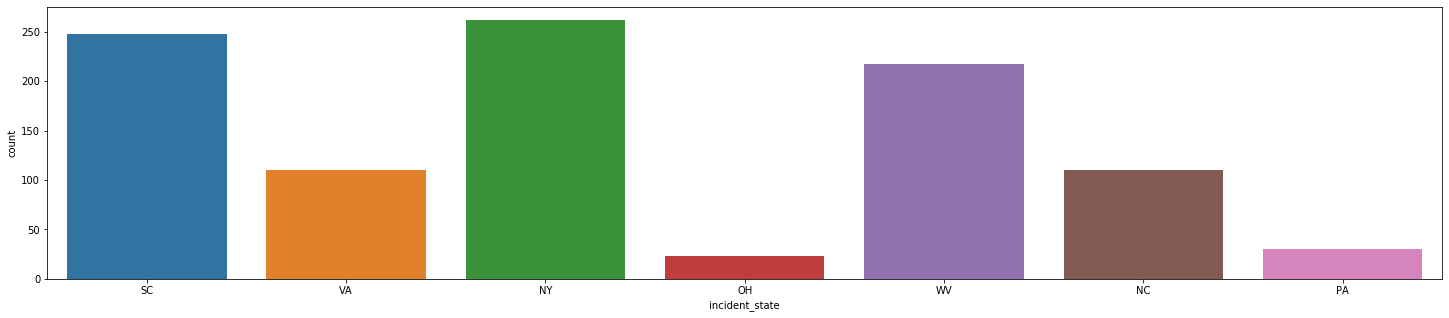

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


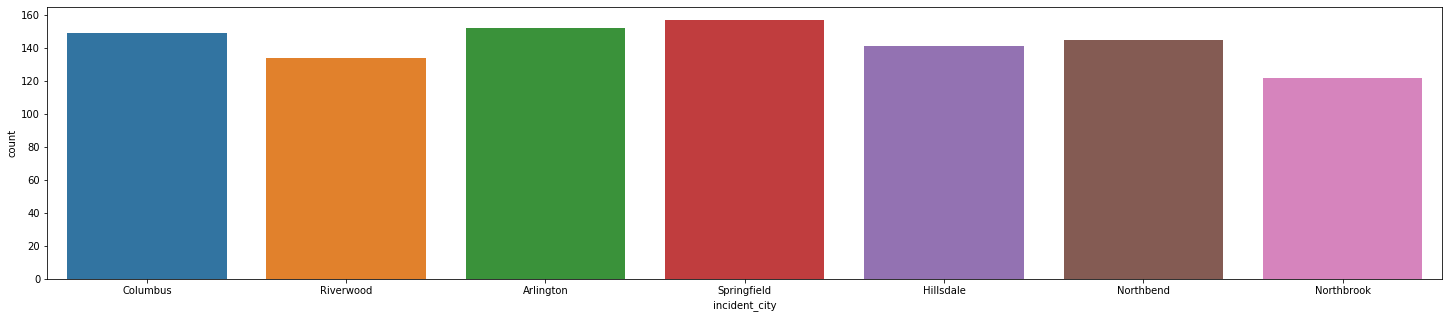

1824 5th Lane           1
2603 Andromedia Hwy     1
2980 Sky Ridge          1
7477 MLK Drive          1
1273 Rock Lane          1
                       ..
6494 4th Ave            1
7601 Andromedia Lane    1
8368 Cherokee Ave       1
9942 Tree Ave           1
6985 Maple Lane         1
Name: incident_location, Length: 1000, dtype: int64


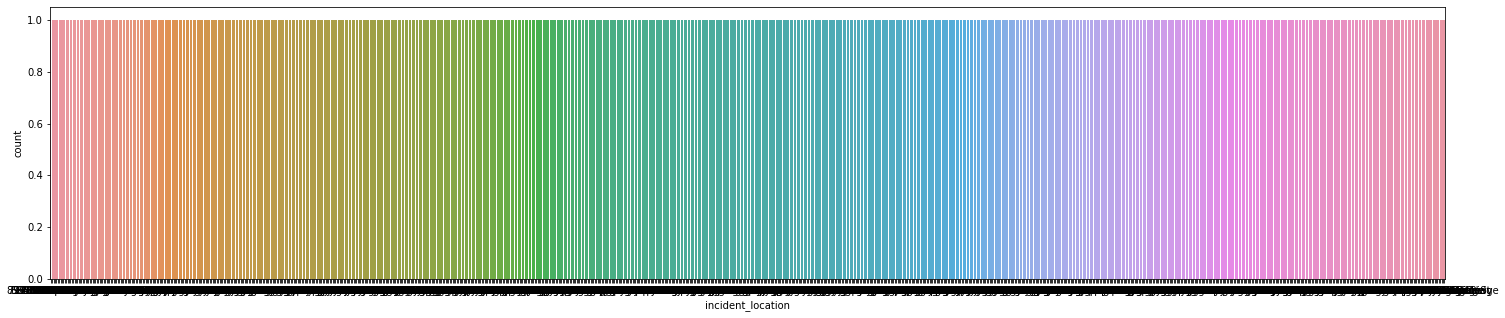

NO     338
YES    302
Name: property_damage, dtype: int64


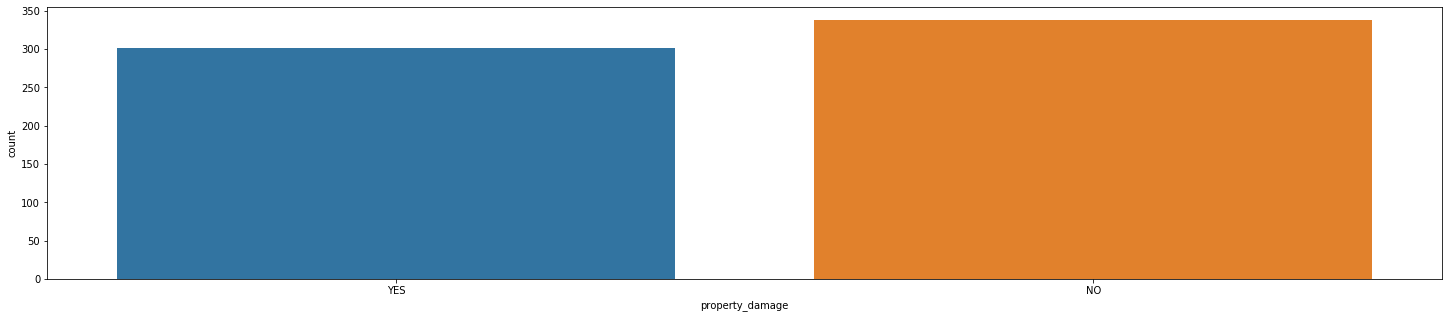

NO     343
YES    314
Name: police_report_available, dtype: int64


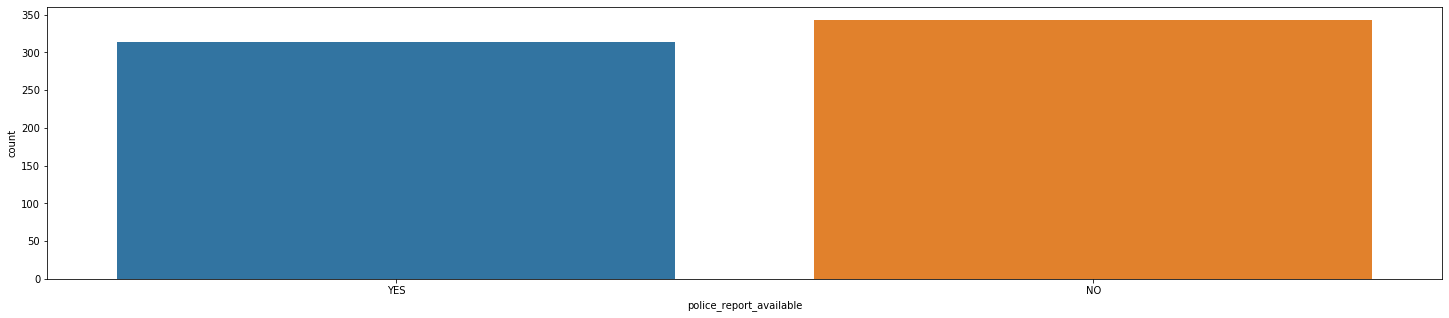

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


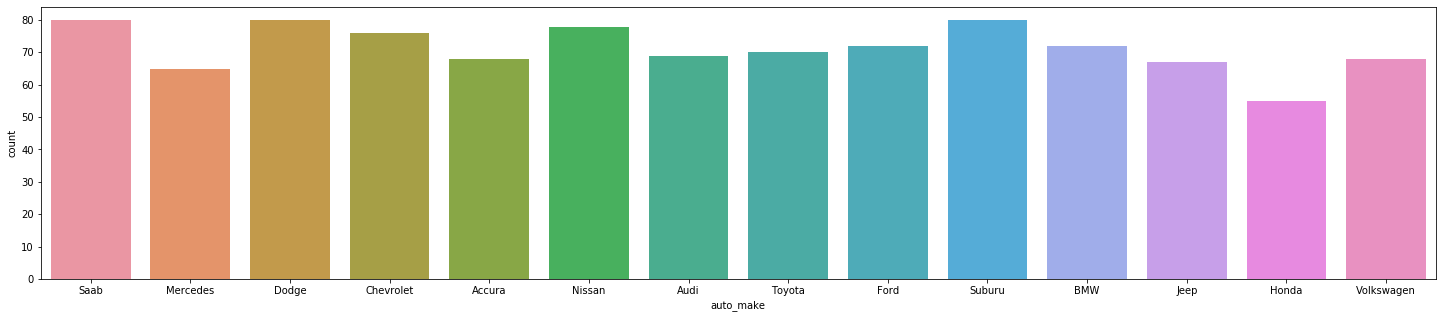

N    753
Y    247
Name: fraud_reported, dtype: int64


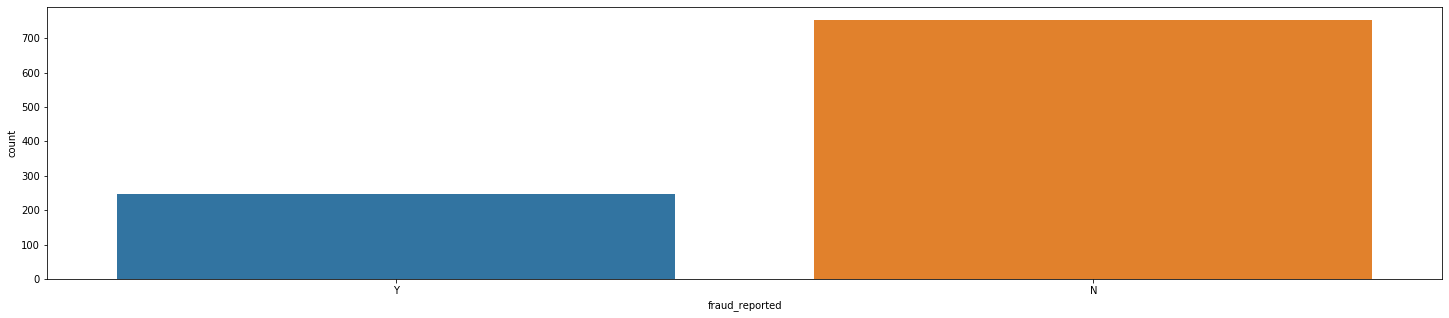

In [19]:
for i in ds1.columns:
    if ds1[i].dtypes=='object':
        print(ds1[i].value_counts())
        plt.figure(figsize=(25,5))
        sns.countplot(ds1[i])
        plt.show()

Female are little more than male in terms of claiming.
Who have lower level of education claim more because they are not as experienced as should be that is why.
Machine-op-inspct has more prone to accident than other occupation that is why they claimed more,farming-fishing are less in claiming.
Who has hobbies as reading are more prone to claim.
who has own-child are claimed more.
multi-vehical-collision and single-vehical-collision are claimed more due to more accident.
Person are claimed more who has some minor damage than major damage and total loss.
NY and SC are state from where claiming is more, may be accident heppen more in these states.
No of claimimg is more for no fraud.

As the target variable is imbalaced,therefore we have to balance it.

months_as_customer


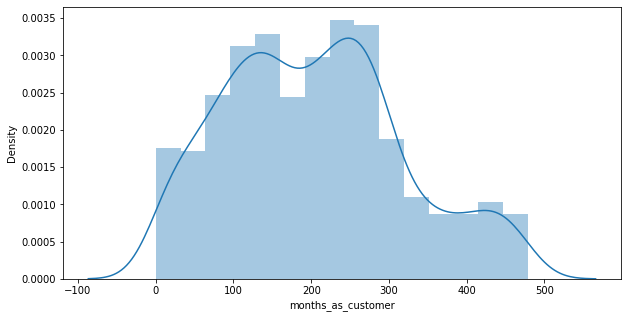

age


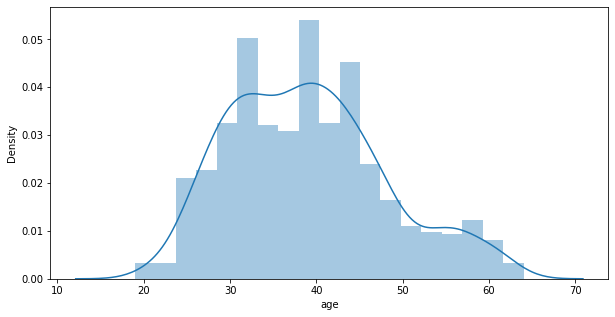

policy_deductable


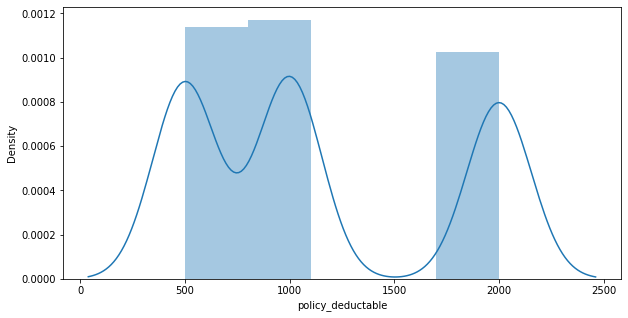

umbrella_limit


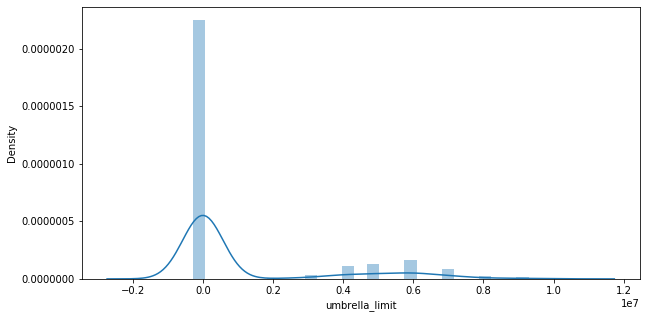

insured_zip


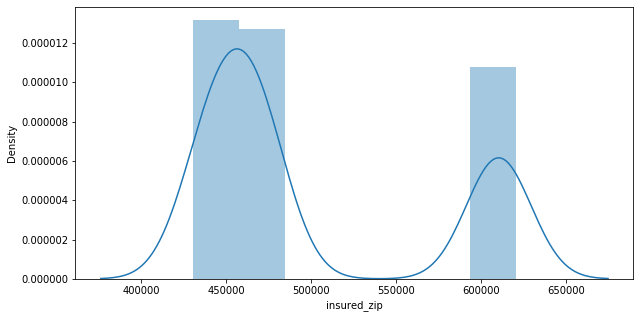

capital-gains


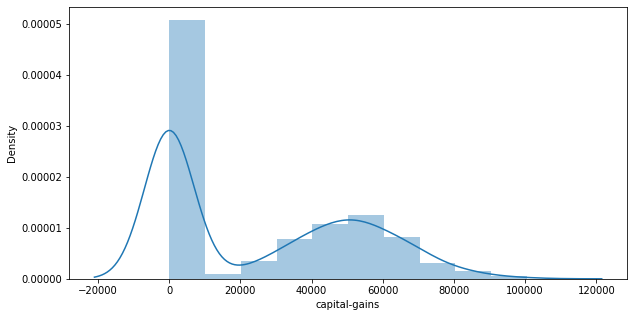

capital-loss


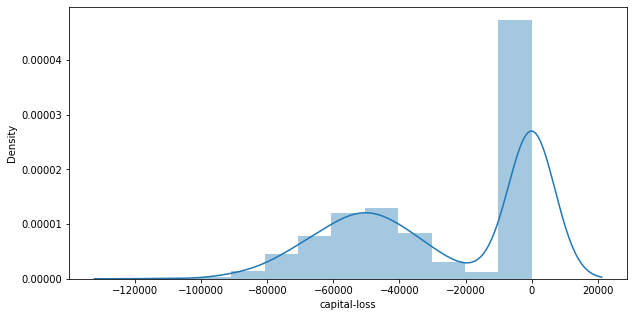

incident_hour_of_the_day


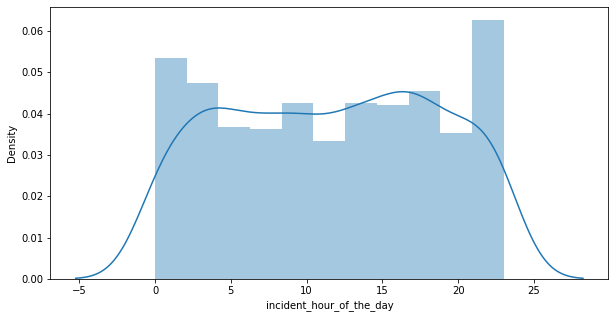

number_of_vehicles_involved


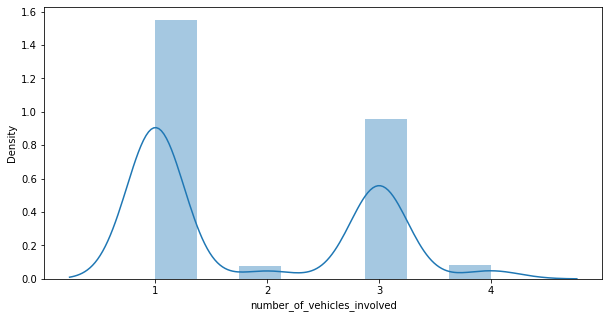

bodily_injuries


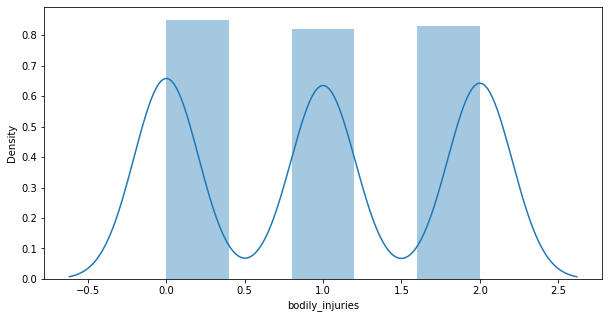

witnesses


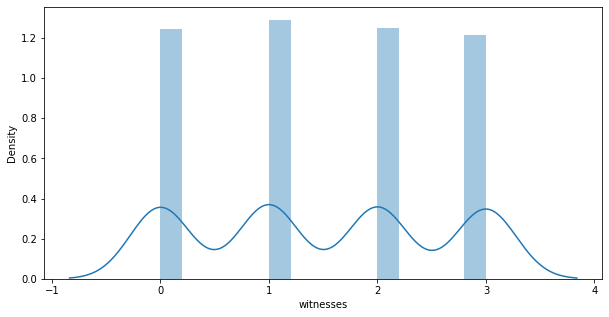

total_claim_amount


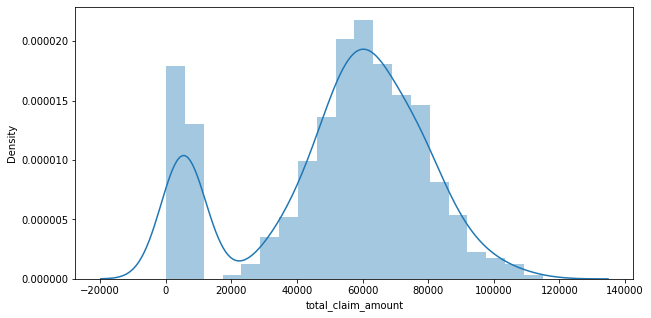

injury_claim


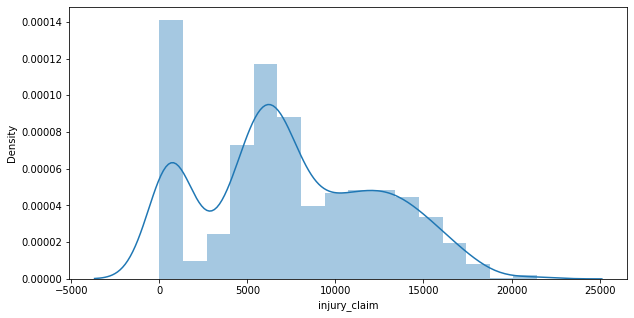

property_claim


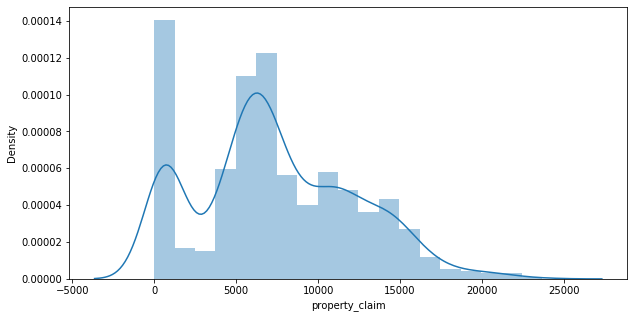

vehicle_claim


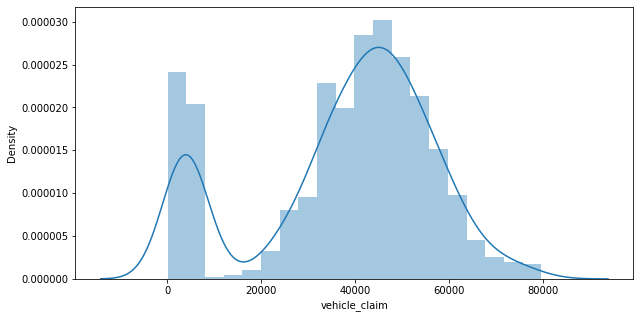

In [20]:
for i in ds1.columns:
    if i==('month'):
        continue
    if i==('day'):
        continue
    if ds[i].dtypes=='int64':
        plt.figure(figsize=(10,5))
        print(i)
        sns.distplot(ds[i])
        plt.show()

Every column is skewed, its like no column is normally distributed.
Some of columns are start with zero value also.

In [21]:
# filling the nan values
# from univariate analysis we analyses columns having null values to be filled by mode is fine, so we do that right now.

ds1['collision_type']=ds1['collision_type'].fillna(ds1['collision_type'].mode()[0])
ds1['property_damage']=ds1['property_damage'].fillna(ds1['property_damage'].mode()[0])
ds1['police_report_available']=ds1['police_report_available'].fillna(ds1['police_report_available'].mode()[0])

In [22]:
ds1.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

### Bivariate Analysis

In [23]:
ds1.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'fraud_reported', 'month', 'day'],
      dtype='object')

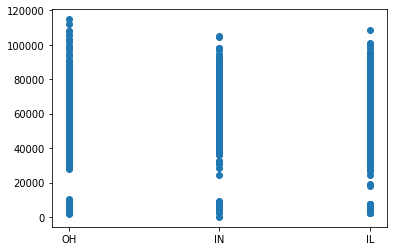

In [24]:
plt.scatter(x=ds1['policy_state'],y=ds1['total_claim_amount'])

Oh state has highest amount to be claimed.

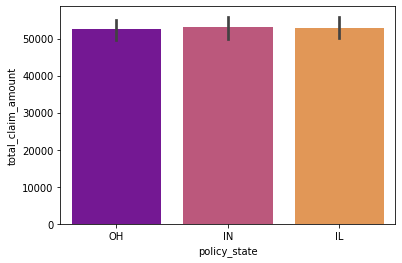

In [26]:
sns.barplot(x='policy_state',y='total_claim_amount',data=ds1,palette='plasma')

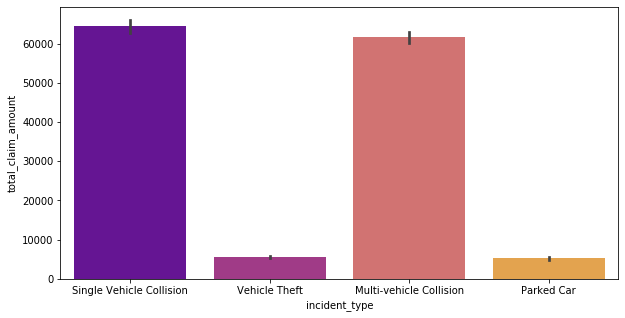

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x='incident_type',y='total_claim_amount',data=ds1,palette='plasma')

total claim amount mainly distributed among whose claim came through single vehicle collision and multi vehical collision. It means major accidents heppend by vehicle collision. 

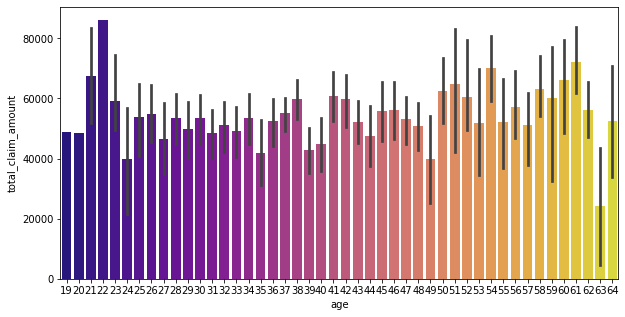

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='age',y='total_claim_amount',data=ds1,palette='plasma')

Mainly amount claimed by the teen or very old age person.

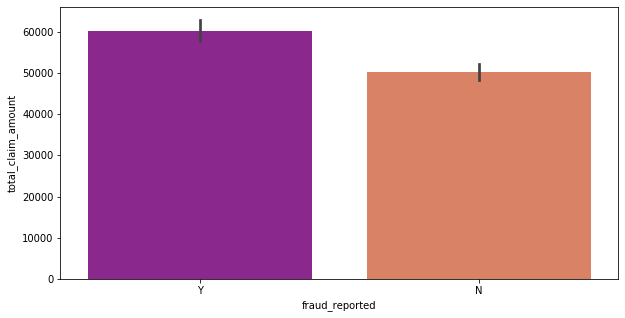

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x='fraud_reported',y='total_claim_amount',data=ds1,palette='plasma')

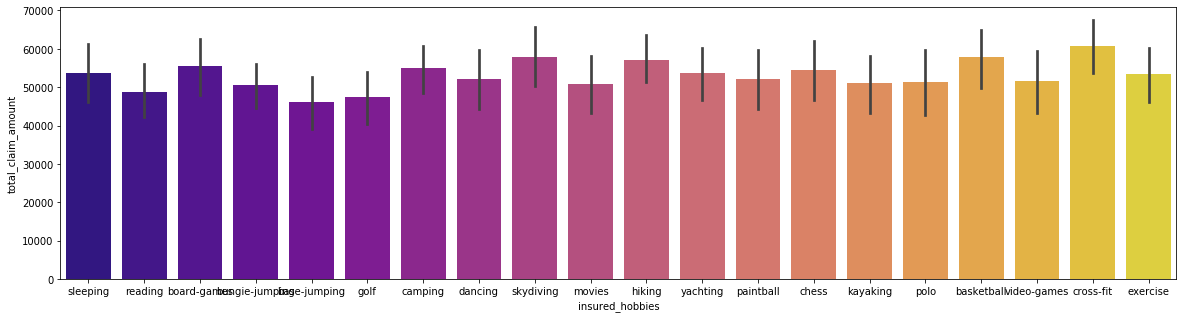

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(x='insured_hobbies',y='total_claim_amount',data=ds1,palette='plasma')

Who have cross-fit as thier hobby claimed more.

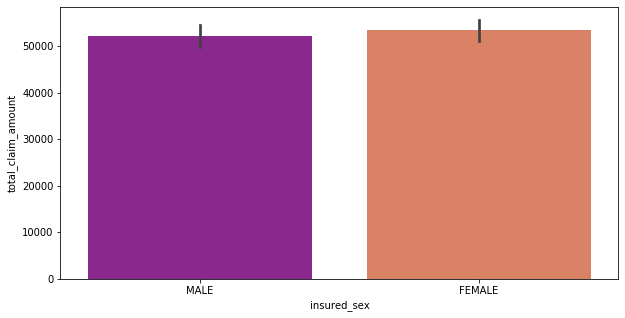

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x='insured_sex',y='total_claim_amount',data=ds1,palette='plasma')

Female claimed more than male one.

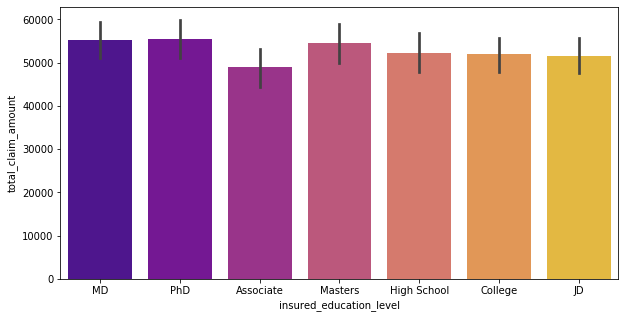

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x='insured_education_level',y='total_claim_amount',data=ds1,palette='plasma')

Who have high education level claimed more amount.

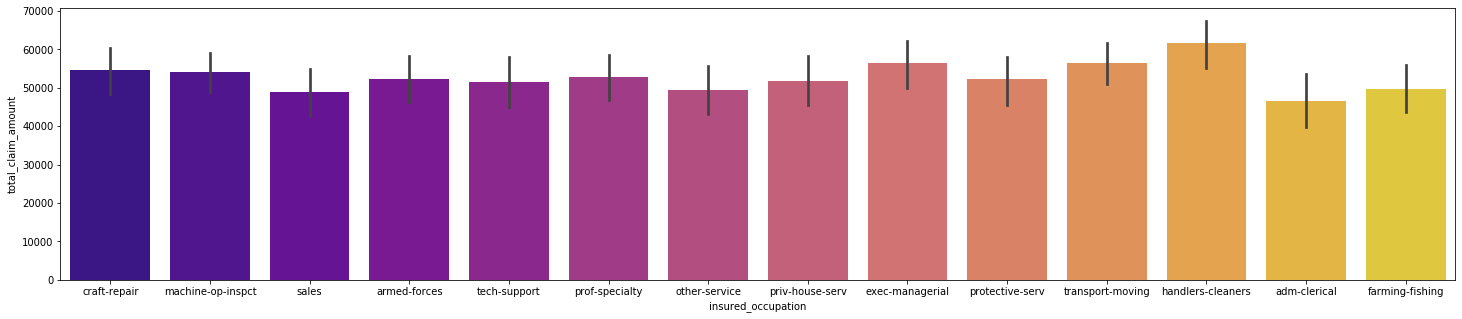

In [41]:
plt.figure(figsize=(25,5))
sns.barplot(x='insured_occupation',y='total_claim_amount',data=ds1,palette='plasma')

Ocuupation as handler and cleaner seems to claim more amount may be due to the more accident heppen with them.

In [42]:
pd.set_option('display.max_columns',35)

In [43]:
ds1.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,month,day
0,328,48,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,Y,10,17
1,228,42,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,Y,6,27
2,134,29,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,N,6,9
3,256,41,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Y,5,25
4,228,44,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,N,6,6


In [44]:
# Encoding of columns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [45]:
le=LabelEncoder()
oe=OrdinalEncoder()

In [46]:
# label for which columns are in some order like insured_sex,propert_damage etc.
# for rest of them we will use ordinal encoder

ds1['policy_state']=le.fit_transform(ds1['policy_state'].values.reshape(-1,1))
ds1['insured_sex']=le.fit_transform(ds1['insured_sex'].values.reshape(-1,1))
ds1['collision_type']=le.fit_transform(ds1['collision_type'].values.reshape(-1,1))
ds1['property_damage']=le.fit_transform(ds1['property_damage'].values.reshape(-1,1))
ds1['police_report_available']=le.fit_transform(ds1['police_report_available'].values.reshape(-1,1))
ds1['fraud_reported']=le.fit_transform(ds1['fraud_reported'].values.reshape(-1,1))

In [47]:
ds1['insured_education_level']=oe.fit_transform(ds1['insured_education_level'].values.reshape(-1,1))
ds1['insured_occupation']=oe.fit_transform(ds1['insured_occupation'].values.reshape(-1,1))
ds1['insured_hobbies']=oe.fit_transform(ds1['insured_hobbies'].values.reshape(-1,1))
ds1['insured_relationship']=oe.fit_transform(ds1['insured_relationship'].values.reshape(-1,1))
ds1['incident_type']=oe.fit_transform(ds1['incident_type'].values.reshape(-1,1))
ds1['incident_severity']=oe.fit_transform(ds1['incident_severity'].values.reshape(-1,1))
ds1['authorities_contacted']=oe.fit_transform(ds1['authorities_contacted'].values.reshape(-1,1))
ds1['incident_state']=oe.fit_transform(ds1['incident_state'].values.reshape(-1,1))
ds1['incident_city']=oe.fit_transform(ds1['incident_city'].values.reshape(-1,1))
ds1['auto_make']=oe.fit_transform(ds1['auto_make'].values.reshape(-1,1))

one column we observe right now incident location which we dont need ,since we have state and city also. We cann drop this.

In [48]:
ds1.drop('incident_location',axis=1,inplace=True)

In [49]:
ds1.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,month,day
0,328,48,2,1000,1406.91,0,466132,1,4.0,2.0,17.0,0.0,53300,0,2.0,2,0.0,4.0,4.0,1.0,5,1,1,1,2,1,71610,6510,13020,52080,10.0,1,10,17
1,228,42,1,2000,1197.22,5000000,468176,1,4.0,6.0,15.0,2.0,0,0,3.0,1,1.0,4.0,5.0,5.0,8,1,0,0,0,0,5070,780,780,3510,8.0,1,6,27
2,134,29,2,2000,1413.14,5000000,430632,0,6.0,11.0,2.0,3.0,35100,0,0.0,1,1.0,4.0,1.0,1.0,7,3,0,2,3,0,34650,7700,3850,23100,4.0,0,6,9
3,256,41,0,2000,1415.74,6000000,608117,0,6.0,1.0,2.0,4.0,48900,-62400,2.0,0,0.0,4.0,2.0,0.0,5,1,0,1,2,0,63400,6340,6340,50720,3.0,1,5,25
4,228,44,0,1000,1583.91,6000000,610706,1,0.0,11.0,2.0,4.0,66000,-46000,3.0,1,1.0,2.0,1.0,0.0,20,1,0,0,1,0,6500,1300,650,4550,0.0,0,6,6


In [50]:
ds1.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,month,day
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.072787,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.020544,0.005750,0.051728
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.075642,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.012143,0.015501,0.053869
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.052438,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,0.029432,0.071450,0.002277
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.053912,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,0.014817,-0.050416,0.009164
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.036556,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.014480,-0.035355,-0.025183
umbrella_limit,0.015498,0.018126,-0.029580,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,0.010041,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.058622,0.009961,-0.045207
insured_zip,0.017895,0.025604,0.008777,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,-0.002355,0.006303,0.049372,-0.010840,-0.016882,-0.023855,-0.017548,-0.047669,-0.017532,0.008274,0.027448,0.023861,0.028695,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.019368,0.015864,-0.039867
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,-0.014293,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,0.030873,-0.004033,0.040713
insured_education_level,-0.000833,0.000969,-0.034327,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.019230,-0.006420,-0.010838,-0.005903,-0.018636,-0.057061,-0.003768,-0.048909,-0.012072,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.008808,-0.007118,0.012610
insured_occupation,0.009814,0.017220,-0.031215,-0.046733,0.035922,0.023422,-0.069077,-0.006160,-0.020298,1.000000,-0.011077,-0.010171,-0.007824,-0.020171,0.003842,0.007401,0.004731,-0.007811,-0.022761,0.000390,-0.018435,-0.015368,-0.016378,-0.000236,-0.014794,-0.025232,0.003692,0.020211,0.003004,-0.000829,0.042621,0.001564,0.026140,-0.006432


### Multivariate Analysis

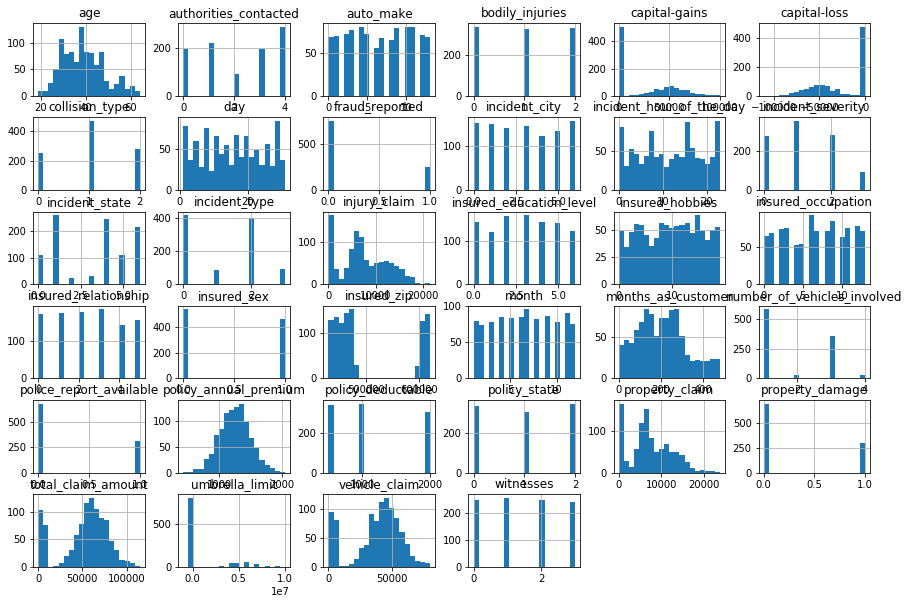

In [51]:
ds1.hist(bins=20,figsize=(15,10))
plt.show()

Here we can observe every columns distribution with frequency.

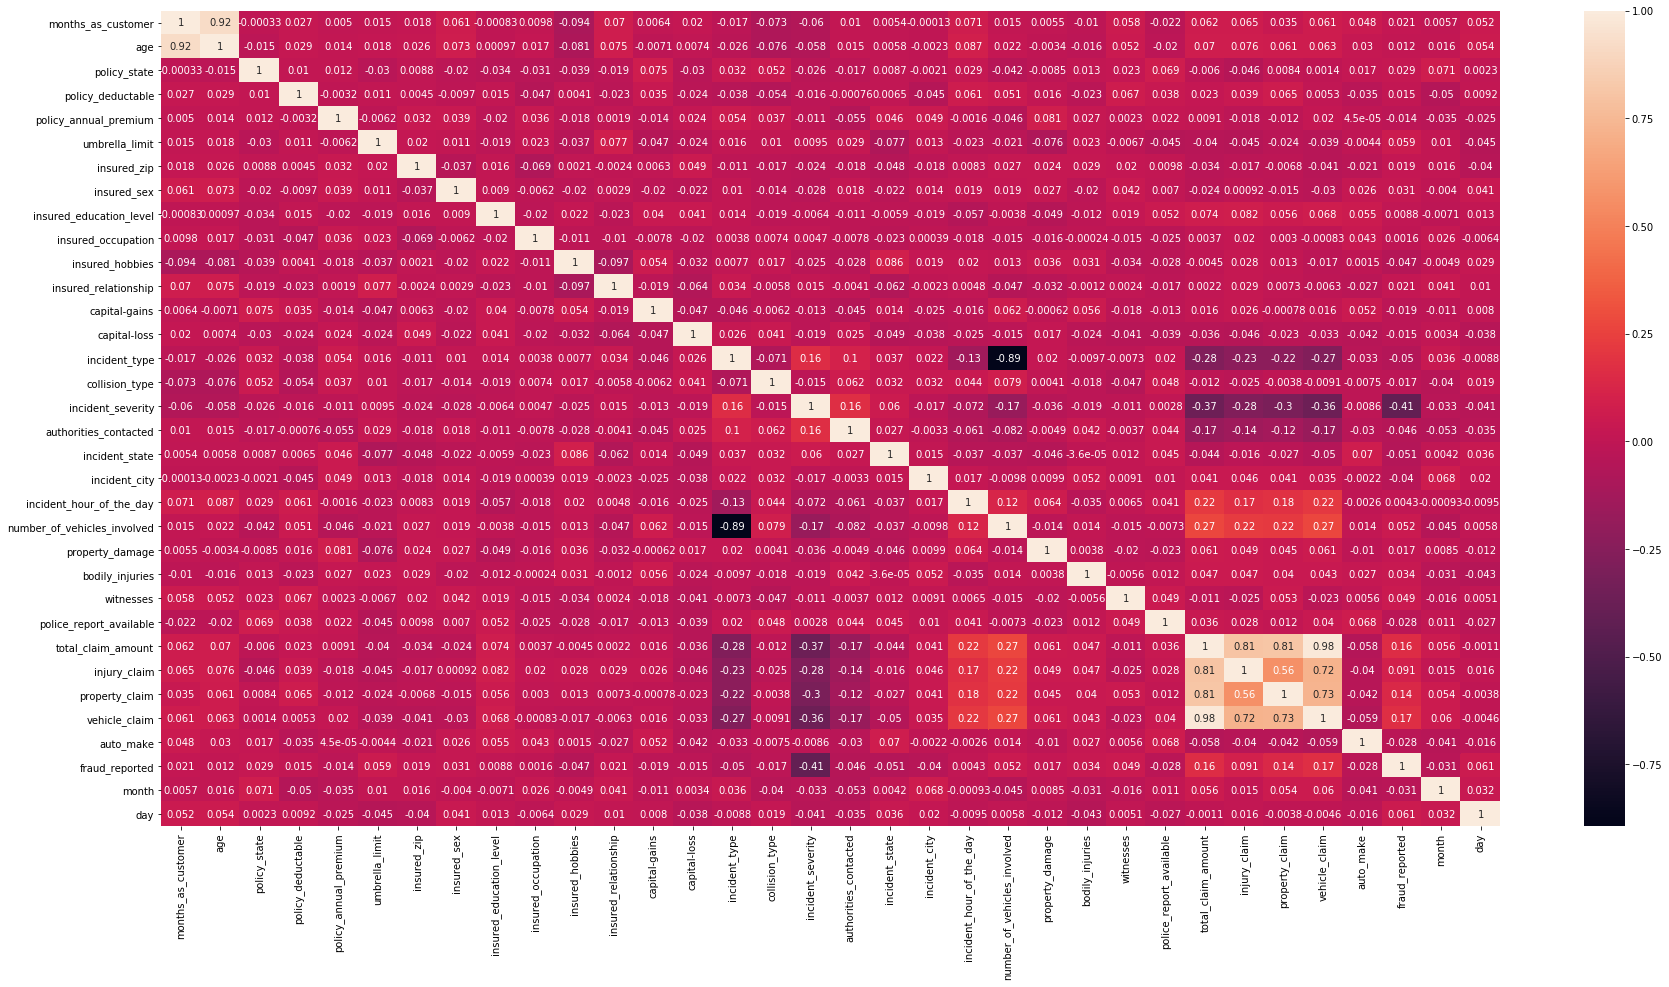

In [52]:
plt.figure(figsize=(30,15))
sns.heatmap(ds1.corr(),annot=True)

Total amount of claim,injury claim,property claim and vehical claim these are the columns which are highly correlated to each other.
above columns also correlated to incident hour of the day and number of vehical involved.
above 4 columns also correlated with target column.
number of vehical involved and incident type both are highly correlated to each other.
month as customer and age also highly correlated, it should be as age increases month increases also as a customer.

### checking for outliers

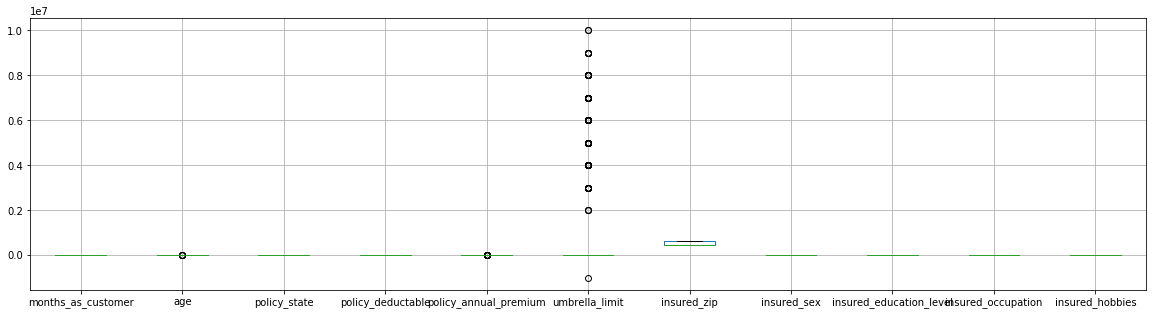

In [53]:
ds1.iloc[:,0:11].boxplot(figsize=[20,6])
plt.subplots_adjust(bottom=.25)
plt.show()

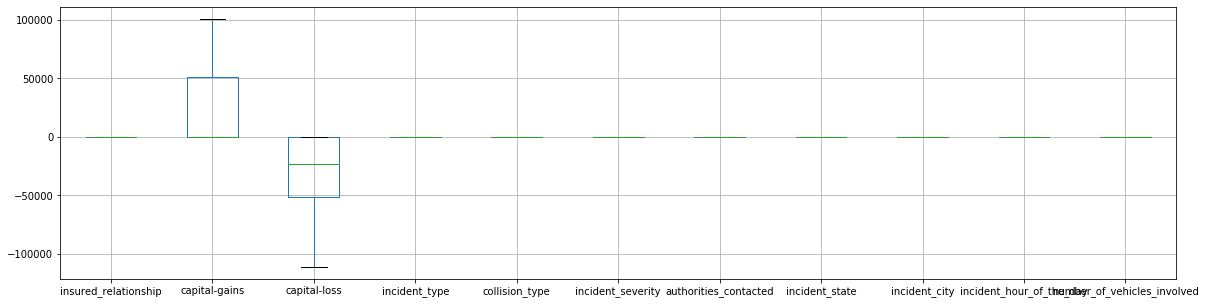

In [54]:
ds1.iloc[:,11:22].boxplot(figsize=[20,6])
plt.subplots_adjust(bottom=.25)
plt.show()

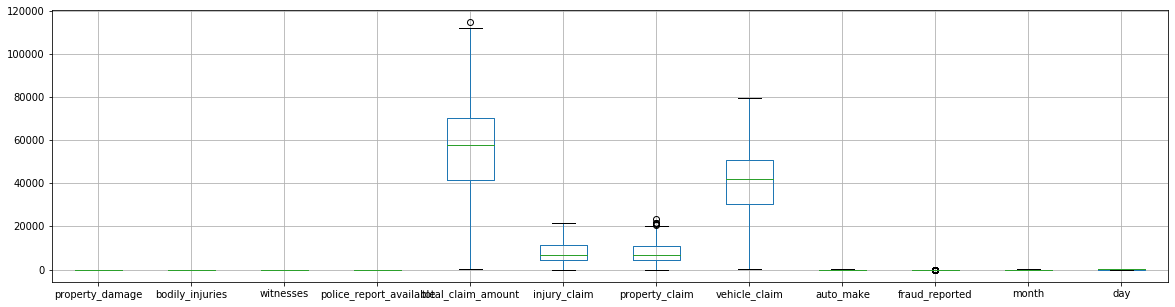

In [55]:
ds1.iloc[:,22:].boxplot(figsize=[20,6])
plt.subplots_adjust(bottom=.25)
plt.show()

Some columns have outliers but they very little we can ignore it, but umbrella limit column has outlier but its values are very high that why may be it shows like outliers, for now we keep it as it is, if there is any need we can remove it later.

### Checking for skewness

In [56]:
ds1.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636


We tried to remove skewness but every method did not do well it became even wrost so we keep it like this.

### Spliting the data into test and train

In [57]:
x=ds1.drop('fraud_reported',axis=1)
x.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,month,day
0,328,48,2,1000,1406.91,0,466132,1,4.0,2.0,17.0,0.0,53300,0,2.0,2,0.0,4.0,4.0,1.0,5,1,1,1,2,1,71610,6510,13020,52080,10.0,10,17
1,228,42,1,2000,1197.22,5000000,468176,1,4.0,6.0,15.0,2.0,0,0,3.0,1,1.0,4.0,5.0,5.0,8,1,0,0,0,0,5070,780,780,3510,8.0,6,27
2,134,29,2,2000,1413.14,5000000,430632,0,6.0,11.0,2.0,3.0,35100,0,0.0,1,1.0,4.0,1.0,1.0,7,3,0,2,3,0,34650,7700,3850,23100,4.0,6,9
3,256,41,0,2000,1415.74,6000000,608117,0,6.0,1.0,2.0,4.0,48900,-62400,2.0,0,0.0,4.0,2.0,0.0,5,1,0,1,2,0,63400,6340,6340,50720,3.0,5,25
4,228,44,0,1000,1583.91,6000000,610706,1,0.0,11.0,2.0,4.0,66000,-46000,3.0,1,1.0,2.0,1.0,0.0,20,1,0,0,1,0,6500,1300,650,4550,0.0,6,6


In [58]:
y=ds1['fraud_reported'].copy()
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

### Scaling of data

In [59]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

In [60]:
x_sc=ss.fit_transform(x)
x_sc=pd.DataFrame(x_sc,columns=x.columns)
x_sc.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,month,day
0,1.078140,0.990836,1.187173,-0.222383,0.616705,-0.479476,-0.489529,1.076953,0.530931,-1.158316,1.281737,-1.437957,1.011331,0.953851,0.766005,1.344000,-1.260614,1.196963,0.351762,-0.962196,-0.956261,-0.823865,1.520282,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,0.856466,1.015026,0.175451
1,0.208995,0.334073,-0.016856,1.412784,-0.242521,1.697980,-0.461008,1.076953,0.530931,-0.162558,0.929078,-0.247595,-0.901927,0.953851,1.691132,-0.030233,-0.195906,1.196963,0.815829,0.995476,-0.524475,-0.823865,-0.657773,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.164894,1.305938
2,-0.608002,-1.088913,1.187173,1.412784,0.642233,1.697980,-0.984885,-0.928546,1.557877,1.082141,-1.363201,0.347586,0.358023,0.953851,-1.084249,-0.030233,-0.195906,1.196963,-1.040437,-0.962196,-0.668404,1.140056,-0.657773,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,-0.164894,-0.728938
3,0.452355,0.224613,-1.220886,1.412784,0.652886,2.133471,1.491682,-0.928546,1.557877,-1.407256,-1.363201,0.942766,0.853388,-1.267577,0.766005,-1.404466,-1.260614,1.196963,-0.576371,-1.451614,-0.956261,-0.823865,-0.657773,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,-0.879279,-0.459874,1.079841
4,0.208995,0.552994,-1.220886,-0.222383,1.341980,2.133471,1.527808,1.076953,-1.522961,1.082141,-1.363201,0.942766,1.467210,-0.683741,1.691132,-0.030233,-0.195906,-0.109052,-1.040437,-1.451614,1.202666,-0.823865,-0.657773,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,-0.164894,-1.068084


In [61]:
x1=x_sc.copy()

In [62]:
# As we know target variable is imbalaced we try to balance it.
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [63]:
x1,y=sm.fit_resample(x1,y)

In [65]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

### Finding the best Random State

In [66]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.20,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc_sc=accuracy_score(y_test,pred)
    if acc_sc>maxacc:
        maxacc=acc_sc
        maxrs=i
print('best acc_sc is:',maxacc,' at random state', maxrs)

best acc_sc is: 0.8874172185430463  at random state 97


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.20,random_state=91)

In [73]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1204, 33) (302, 33) (1204,) (302,)


### Model Training 

In [69]:
from xgboost import XGBClassifier

In [70]:
lgit=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
gnb=GaussianNB()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
adc=AdaBoostClassifier()
xgc=XGBClassifier()

In [74]:
model=(lgit,dtc,svc,gnb,knc,rfc,adc,xgc)

for i in model:
    print("Model",i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('clasification_report',classification_report(y_test,pred))
    score=cross_val_score(i,x1,y,cv=5)
    print(score.mean())
    print('\n')

Model LogisticRegression()
accuracy_score 0.7284768211920529
confusion_matrix [[106  37]
 [ 45 114]]
clasification_report               precision    recall  f1-score   support

           0       0.70      0.74      0.72       143
           1       0.75      0.72      0.74       159

    accuracy                           0.73       302
   macro avg       0.73      0.73      0.73       302
weighted avg       0.73      0.73      0.73       302

0.7284108160436514


Model DecisionTreeClassifier()
accuracy_score 0.8410596026490066
confusion_matrix [[124  19]
 [ 29 130]]
clasification_report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       143
           1       0.87      0.82      0.84       159

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302

0.8353743592000177


Model SVC()
accuracy_score 0.8807947019867549
confusion_

We choose few model for hyperparameter tuning on the basis of differnce between accuracy_score and cv score.
As we see that decision classifier, gaussianNB and xgboost classifier these 3 have large difference so we will not consider it for parameter tuning.

### Hyperparameter Tuning using GridSearchCV

In [75]:
# 1. FOR LOGISTIC REGRESSION

parameters={'C':np.arange(1,10),'penalty':['l1','l2','elasticnet'],'max_iter':[100,130,150,180,200],'n_jobs':[-1]}
gs=GridSearchCV(lgit,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_iter': [100, 130, 150, 180, 200], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [76]:
gs.best_params_

{'C': 1, 'max_iter': 100, 'n_jobs': -1, 'penalty': 'l2'}

In [77]:
lg=LogisticRegression(C=1,penalty='l2',max_iter=100,n_jobs=-1)
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predlg))
print('confusion_matrix',confusion_matrix(y_test,predlg))
print('clasification_report',classification_report(y_test,predlg))

accuracy_score 0.7284768211920529
confusion_matrix [[106  37]
 [ 45 114]]
clasification_report               precision    recall  f1-score   support

           0       0.70      0.74      0.72       143
           1       0.75      0.72      0.74       159

    accuracy                           0.73       302
   macro avg       0.73      0.73      0.73       302
weighted avg       0.73      0.73      0.73       302



In [78]:
# FOR SVC

parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[1.0,2.0,3.0,4.0],'probability':[True],'gamma':['scale','auto']}

gs=GridSearchCV(svc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'probability': [True]})

In [79]:
gs.best_params_

{'C': 4.0, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}

In [80]:
sv=SVC(kernel='rbf',probability=True,C=4.0,gamma='scale')
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predsv))
print('confusion_matrix',confusion_matrix(y_test,predsv))
print('clasification_report',classification_report(y_test,predsv))

accuracy_score 0.9105960264900662
confusion_matrix [[123  20]
 [  7 152]]
clasification_report               precision    recall  f1-score   support

           0       0.95      0.86      0.90       143
           1       0.88      0.96      0.92       159

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302



In [81]:
# FOR RANDOM FOREST CLASSIFIER

parameters={'n_estimators':(100,150,180,200,250),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

gs=GridSearchCV(rfc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 180, 200, 250)})

In [82]:
gs.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 250}

In [84]:
rf=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=250)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predrf))
print('confusion_matrix',confusion_matrix(y_test,predrf))
print('clasification_report',classification_report(y_test,predrf))

accuracy_score 0.9105960264900662
confusion_matrix [[135   8]
 [ 19 140]]
clasification_report               precision    recall  f1-score   support

           0       0.88      0.94      0.91       143
           1       0.95      0.88      0.91       159

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302



In [86]:
# FOR DECISION TREE CLASSIFIER

parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'max_depth':range(1,10)}

gs=GridSearchCV(dtc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [87]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}

In [88]:
dt=DecisionTreeClassifier(criterion='gini',max_features='sqrt',max_depth=5)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('accuracy_score',accuracy_score(y_test,preddt))
print('confusion_matrix',confusion_matrix(y_test,preddt))
print('clasification_report',classification_report(y_test,preddt))

accuracy_score 0.8079470198675497
confusion_matrix [[124  19]
 [ 39 120]]
clasification_report               precision    recall  f1-score   support

           0       0.76      0.87      0.81       143
           1       0.86      0.75      0.81       159

    accuracy                           0.81       302
   macro avg       0.81      0.81      0.81       302
weighted avg       0.81      0.81      0.81       302



In [89]:
# FOR ADABOOST CLASSIFIER

parameters={'n_estimators':[100,130,150,170,200],'learning_rate':[0.0001,0.001,0.01,0.2,0.1,1.0],
            'algorithm':['SAMME','SAMME.R']}
gs=GridSearchCV(adc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.2, 0.1, 1.0],
                         'n_estimators': [100, 130, 150, 170, 200]})

In [90]:
gs.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 150}

In [92]:
ad=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.0,n_estimators=200)
ad.fit(x_test,y_test)
predad=ad.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predad))
print('confusion_matrix',confusion_matrix(y_test,predad))
print('clasification_report',classification_report(y_test,predad))

accuracy_score 0.9834437086092715
confusion_matrix [[141   2]
 [  3 156]]
clasification_report               precision    recall  f1-score   support

           0       0.98      0.99      0.98       143
           1       0.99      0.98      0.98       159

    accuracy                           0.98       302
   macro avg       0.98      0.98      0.98       302
weighted avg       0.98      0.98      0.98       302



From all models logistic regression given list accuracy so we can drop that and rest are going for roc curve and score

### AUC ROC CURVE AND SCORE

In [93]:
from sklearn.metrics import roc_curve,roc_auc_score

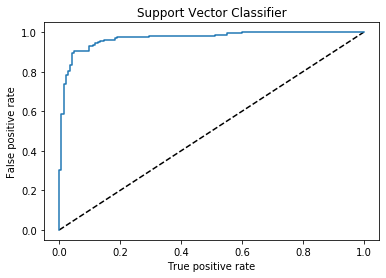

In [94]:
# FOR SVC

pred_prob=sv.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Support Vector Classifier')
plt.show()

In [95]:
auc_score=roc_auc_score(y_test,predsv)
auc_score

0.9080573514535779

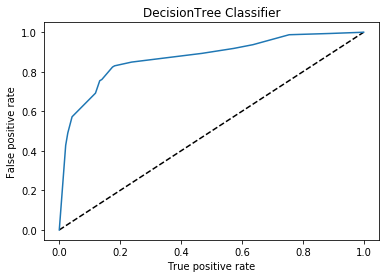

In [96]:
# FOR DECISIONTREE CLASSIFIER

pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTree Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('DecisionTree Classifier')
plt.show()

In [97]:
auc_score=roc_auc_score(y_test,preddt)
auc_score

0.8109249241324713

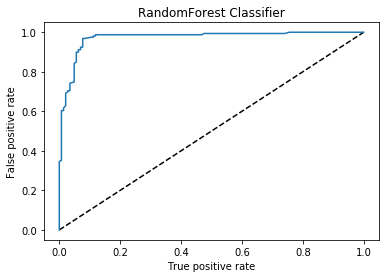

In [98]:
# RANDOM FOREST CLASSIFIER

pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForest Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('RandomForest Classifier')
plt.show()

In [99]:
auc_score=roc_auc_score(y_test,predrf)
auc_score

0.912279544355016

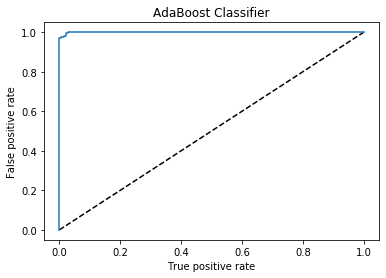

In [100]:
# ADABOOST CLASSIFIER

pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [101]:
auc_score=roc_auc_score(y_test,predad)
auc_score

0.9835730307428421

On the basis of roc_auc_score AdaBoostClassifier worked best, So this will be our final model.

### Saving Our Final Model

In [102]:
import joblib

In [103]:
joblib.dump(ad,'Insurance_claim_fraud_ad.obj')

['Insurance_claim_fraud_ad.obj']